# Ejercicios 5 y 6

El brillo modifica la luminosidad total de la imagen, por ejemplo aclarando los colores oscuros y blanqueando los claros, mientras que el contraste ajusta la diferencia entre los colores más claros y los más oscuros.

In [3]:
import cv2 as cv

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [46]:
def change_brightness_contrast(img, brightness=0, contrast=0):
    floatImg = img.astype(float)
    auxImg = floatImg.copy()
    if (contrast != None):
        contrastFactor = float( (259*(contrast+255)) / (255 * (259 - contrast)) )
        auxImg = (contrastFactor * (auxImg - 128) ) + 128
        auxImg[auxImg<0] = 0
        auxImg[auxImg>255] = 255
    if (brightness != None):
        brImg = auxImg + (brightness - auxImg.mean())
    else:
        brImg = auxImg
    result = brImg.astype(int)
    result[result<0] = 0
    result[result>255] = 255
    return result

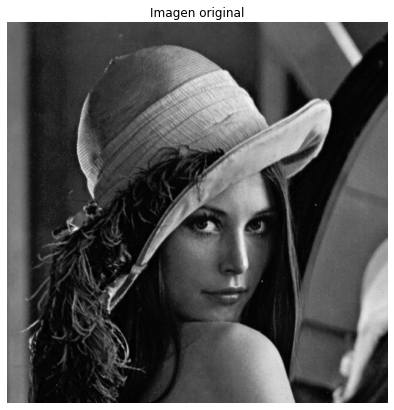

In [43]:
image = cv.imread('../resources/lena.tif', cv.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(7,7))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Imagen original")
plt.show()

[]
[]
[]


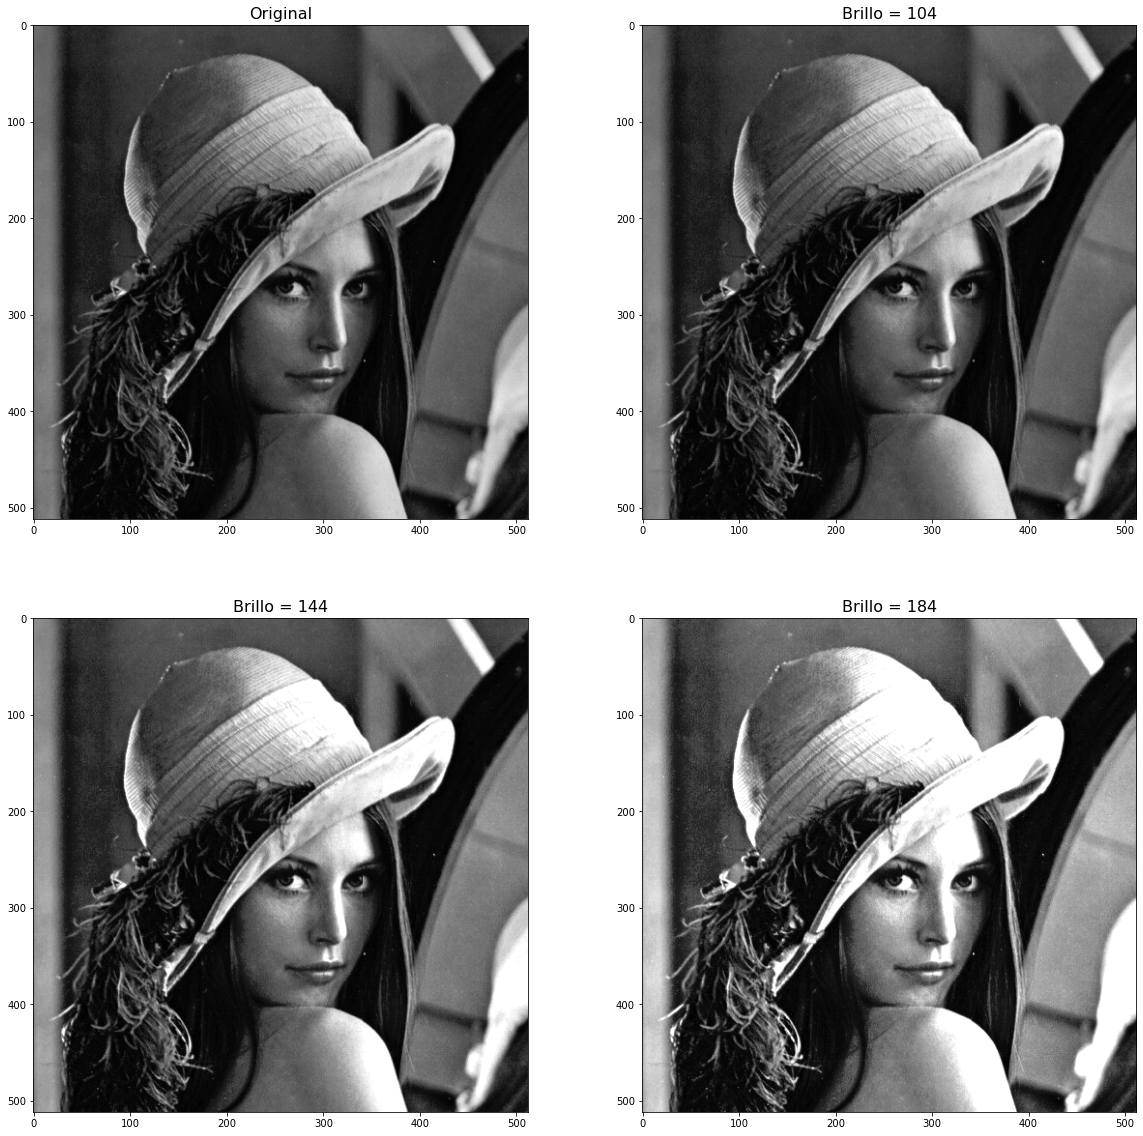

In [44]:
initial_brightness = image.mean()
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for i in range(0,4):
    if i == 0:
        ax.flatten()[i].imshow(image, cmap='gray')
        ax.flatten()[i].set_title('Original', fontsize=16)
    else:     
        ax.flatten()[i].imshow(change_brightness_contrast(image, brightness=initial_brightness + i*40), cmap='gray')
        ax.flatten()[i].set_title('Brillo = ' + str(int(initial_brightness + i*40)), fontsize=16)

plt.show()

[ -2.20856566  -6.15427977  -3.5238037  ... -20.62189818 -16.67618407
  -7.46951781]
[ -4.44816119  -0.17563986  -5.87233497 ... -18.68989895 -10.1448563
  -3.02398742]
[ -9.39739316 -15.5725569  -10.94118409 ... -31.01046624 -21.74772063
 -14.02876596]


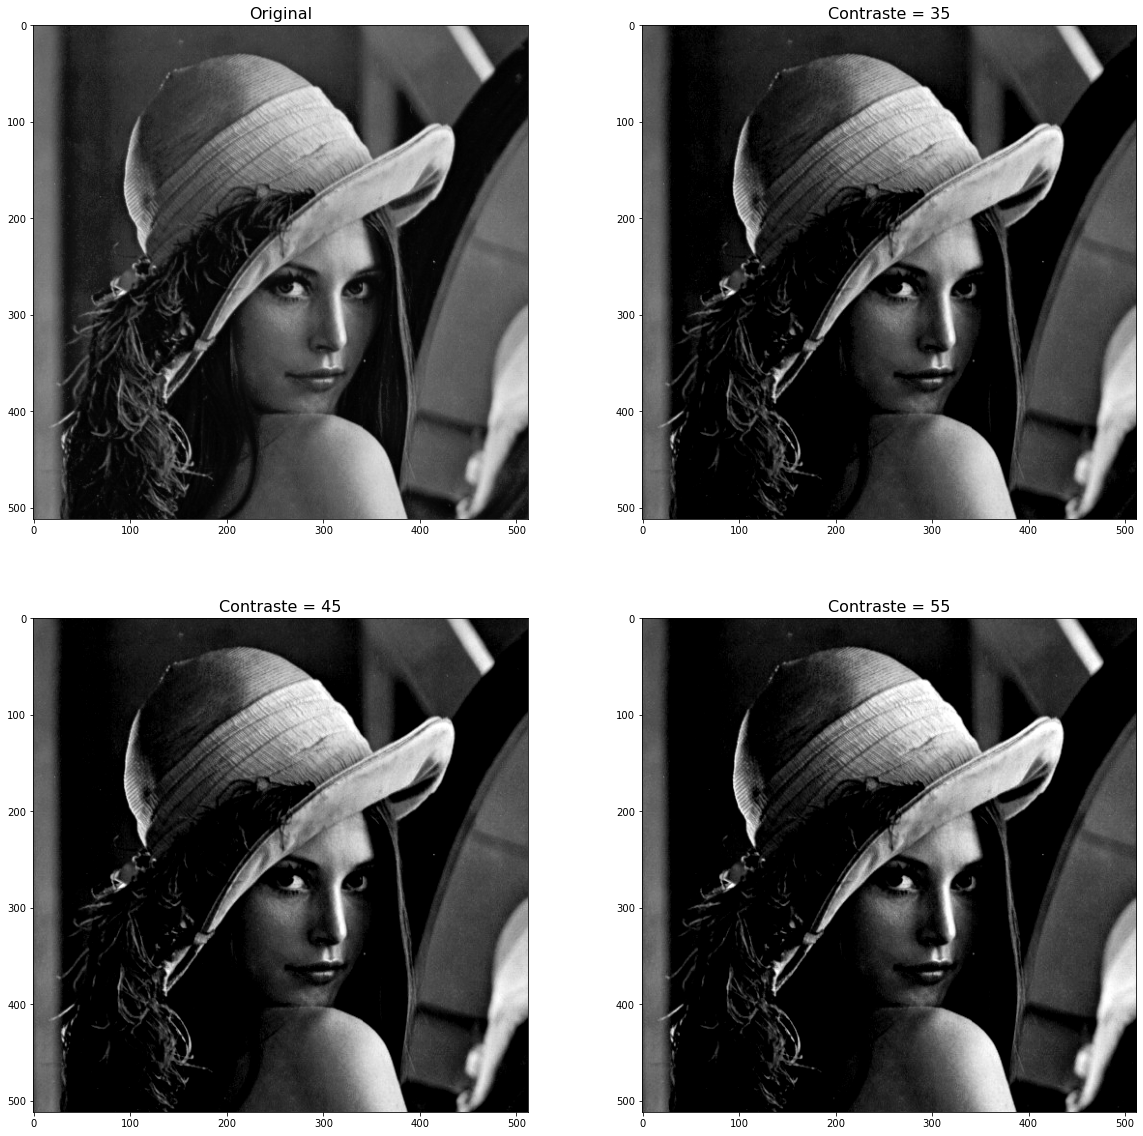

In [45]:
initial_contrast = image.std()
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for i in range(0,4):
    if i==0:
        ax.flatten()[i].imshow(image, cmap='gray')
        ax.flatten()[i].set_title('Original', fontsize=16)
    else:
        ax.flatten()[i].imshow(change_brightness_contrast(image,brightness=initial_brightness, contrast=initial_contrast/2 + i*10), cmap='gray')
        ax.flatten()[i].set_title('Contraste = ' + str(int(initial_contrast/2 + i*10)), fontsize=16)

plt.show()